<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PROYECTO4/tutorialNeurokit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

<h3><b>Mini-Tutorial: Uso de NeuroKit para el Análisis de Señales ECG</h3></b>

NeuroKit <b>[1]</b> es una biblioteca de Python que permite procesar y analizar señales fisiológicas como ECG. Este tutorial detalla cómo usar este módulo para analizar señales ECG, describiendo las funciones más relevantes y cómo extraer características importantes para modelos predictivos y análisis de datos.

#<h3><b>1. Instalación</h3></b>
Antes de comenzar, asegúrate de instalar NeuroKit y otras dependencias necesarias para el manejo y visualización de datos.

In [ ]:
pip install neurokit2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\Mariana\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importar bibliotecas necesarias para manejo de datos

In [ ]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#<h3><b>2. Generar o cargar una señal ECG</h3></b>
Con Neurokit tienes dos opciones: Generar una señal ECG simulada o cargar una señal ECG que desees analizar.

<b>Opción 1. Generar una señal ECG</b>

NeuroKit incluye la función `ecg_simulate` para crear señales ECG simuladas útiles para practicar.

A continuación se muestra un ejemplo de los argumentos que se pueden definir para esta función <b>[1]</b>: `ecg_simulate (duration=10, length=None, sampling_rate=1000, noise=0.01, heart_rate=70, heart_rate_std=1, method='ecgsyn', random_state=None, random_state_distort='spawn')`

- `duration` (int): Duración de registro de la señal en segundos.  
- `sampling_rate` (int): Frecuencia de muestreo en Hz.  
- `length` (int): Número de muestras de la señal.  
- `noise` (float): Nivel de ruido (amplitud del ruido Laplaciano).  
- `heart_rate` (int): Frecuencia cardíaca simulada en latidos por minuto (bpm). Por defecto, es 70 bpm, aunque se esperan fluctuaciones para simular un ritmo cardíaco real.  
- `heart_rate_std` (int): Desviación estándar de la frecuencia cardíaca en bpm.  
- `method` (str): Modelo para generar la señal:  
   - `"simple"`: Basado en wavelets de Daubechies para aproximar un ciclo cardíaco
   - `"ecgsyn"` (por defecto): Modelo descrito por McSharry <i>et al</i> (2003)  
   - `"multileads"`: Genera un DataFrame con 12 derivaciones de ECG.  
- `random_state`: Semilla para el generador de números aleatorios
- `random_state_distort`: Semilla para distorsionar la señal con ruido independiente o dependiente
- `kwargs`: Parámetros adicionales para el algoritmo ECGSYN (como <i>lfhfratio</i>, <i>ti</i>, <i>ai</i>, <i>bi</i>)


Se puede utilizar la función `signal_plot` graficar la señal simulada.

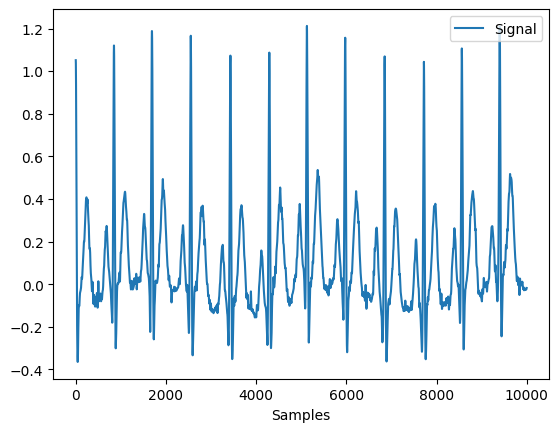

In [ ]:
ecg_signal = nk.ecg_simulate(duration=10, sampling_rate=1000, noise=0.05)
nk.signal_plot(ecg_signal, subplots=False)

plt.show()

<b>Opción 2. Cargar una señal ECG</b>

Carga tu archivo <i>csv</i>. En caso de que no esté filtrado o procesado, con Neurokit puedes darle procesamiento a tu señal. Cuando tienes tu propio archivo puedes modificar la función `signal_plot` para ajustar los parámetros.

En este caso tenemos una señal ecg de 12 derivaciones con una frecuencia de muestreo de 500 Hz.

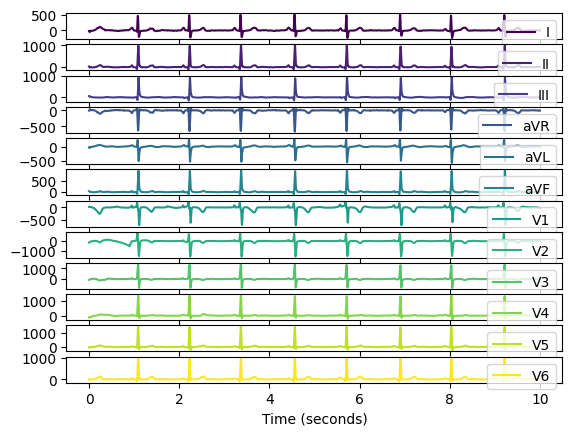

In [ ]:
datos = pd.read_csv('MUSE_20180112_073319_29000.csv', delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
nk.signal_plot(datos, sampling_rate=500, subplots=True)

#<h3><b>3. Procesamiento de la señal</h3></b>
    
La función `ecg_process` simplifica el análisis de señales ECG al realizar múltiples pasos de preprocesamiento y análisis de manera automática. Esta herramienta es ideal para obtener rápidamente información relevante sobre una señal ECG sin necesidad de implementar manualmente cada etapa.

A continuación se muestra un ejemplo de los argumentos que se pueden definir para esta función <b>[1]</b>: `ecg_process(ecg_signal, sampling_rate=1000, method='neurokit)`

- `ecg_signal` (list, np.array, pd.Series): Señal ECG de un solo canal en formato bruto
- `sampling_rate` (int): Frecuencia de muestreo de la señal ECG en Hz (muestras por segundo). El valor predeterminado es 1000 Hz
- `method` (str): Método utilizado para la limpieza de la señal (`ecg_clean()`) y la detección de picos (`ecg_peaks()`). El valor predeterminado es `'neurokit'`. Otros métodos disponibles son: `'pantompkins1985'`, `'hamilton2002'`, `'elgendi2010'`, `'engzeemod2012'`

La función combina varias etapas de análisis que incluyen:

1. <b>Limpieza de la señal (`ecg_clean()`):</b> Filtra la señal para eliminar ruido, interferencias y artefactos, utilizando métodos como filtros de Savitzky-Golay, IIR o FIR. Esto mejora la calidad de la señal para análisis posteriores.

2. <b>Detección de picos R (`ecg_peaks()`):</b> Identifica los picos R en el ECG, que son los puntos clave para calcular parámetros como frecuencia cardíaca y variabilidad de la misma.

3. <b>Cálculo de frecuencia cardíaca (`signal_rate()`):</b>
Calcula la frecuencia cardíaca a partir de los picos R detectados, reportándola en latidos por minuto (BPM).

4. <b>Evaluación de calidad de la señal (`ecg_quality()`):</b>
Analiza la calidad de la señal ECG para identificar si está suficientemente limpia para análisis confiables.

5. <b>Delineación del complejo QRS (`ecg_delineate()`):</b>
Delimita las diferentes ondas y segmentos del ECG (ondas P, QRS, T), permitiendo análisis detallados del ciclo cardíaco.

6. <b>Determinación de fases cardíacas (`ecg_phase()`):</b>
Identifica las fases del ciclo cardíaco (sístole y diástole), lo cual es útil para analizar patrones específicos.

Existen diversos métodos disponibles que puedes variar según tus necesidades:<br><br>

| Método           | Descripción                                                                                     |
|-------------------|-------------------------------------------------------------------------------------------------|
| <b>`neurokit`</b>    | Método predeterminado. Utiliza un filtro de Savitzky-Golay y herramientas adicionales para garantizar una señal suave y libre de artefactos. |
| <b>`biosppy`</b>    | Basado en el paquete BioSPPy. Utiliza filtros bandpass para preservar las frecuencias típicas del ECG. |
| <b>`pamtompkins1985`</b> | Implementa el método clásico de Pan-Tompkins para la detección de ondas QRS y limpieza. |
| <b>`hamilton2002`</b>| Método que enfatiza la detección robusta de picos R incluso en presencia de ruido.               |
| <b>`elgendi2010`</b> | Método simple basado en la derivada de la señal y umbrales fijos para la detección de picos.     |



Una vez cargada la señal (como la derivación II del ECG), puedes procesarla así:

In [ ]:
signal_ekg = datos['II'].values
signals, info = nk.ecg_process(signal_ekg, sampling_rate=500,method='neurokit')

La función retorna un dataframe. Esta es la información que almacena el dataframe y de la cual puedes extraer las características de tu interés:<br><br>

| <b>Columna</b>                                | <b>Descripción<b>                                                                                        |
|--------------------------------------------|---------------------------------------------------------------------------------------------------------|
|<b>ECG_Raw</b>                                | La señal bruta.                                                                                         |
| <b>ECG_Clean</b>                              | La señal limpia.                                                                                         |
| <b>ECG_Rate</b>                               | Frecuencia cardíaca interpolada entre los picos R.                                                        |
| <b>ECG_Quality</b>                            | La calidad de la señal limpia.                                                                           |
| <b>ECG_R_Peaks</b>                            | Los picos R marcados como “1” en una lista de ceros.                                                     |
| <b>ECG_R_Onsets</b>                           | Los inicios R marcados como “1” en una lista de ceros.                                                   |
| <b>ECG_R_Offsets</b>                          | Los desplazamientos R marcados como “1” en una lista de ceros.                                          |
| <b>ECG_P_Peaks</b>                            | Los picos P marcados como “1” en una lista de ceros.                                                     |
| <b>ECG_P_Onsets</b>                           | Los P-onsets marcados como “1” en una lista de ceros.                                                   |
| <b>ECG_P_Offsets</b>                          | Los desplazamientos P marcados como “1” en una lista de ceros.                                          |
| <b>ECG_Q_Peaks</b>                            | Los picos Q marcados como “1” en una lista de ceros.                                                     |
| <b>ECG_S_Peaks</b>                            | Los picos S marcados como “1” en una lista de ceros.                                                     |
| <b>ECG_T_Peaks</b>                            | Los picos T marcados como “1” en una lista de ceros.                                                     |
| <b>ECG_T_Onsets</b>                           | Los inicios T marcados como “1” en una lista de ceros.                                                   |
| <b>ECG_T_Offsets</b>                          | Los desplazamientos T marcados como “1” en una lista de ceros.                                          |
| <b>ECG_Phase_Atrial</b>                       | Fase cardíaca, marcada por “1” para sístole y “0” para diástole.                                          |
| <b>ECG_Phase_Completion_Atrial</b>            | Finalización de la fase cardíaca (auricular), expresada en porcentaje (de 0 a 1), que representa el estadio de la fase cardíaca actual. |
| <b>ECG_Phase_Completion_Ventricular</b>       | Finalización de la fase cardíaca (ventricular), expresada en porcentaje (de 0 a 1), que representa el estadio de la fase cardíaca actual. |
| <b>rpeaks</b>                        | Un diccionario que contiene las muestras en las que se producen los picos R, accesible con la clave "ECG_R_Peaks", así como la frecuencia de muestreo de las señales. |

In [ ]:
df = pd.json_normalize(info)
df_info = df.T
df_info

,0
method_peaks,neurokit
method_fixpeaks,None
ECG_R_Peaks,"[547, 1116, 1685, 2283, 2858, 3454, 4018, 4609]"
ECG_R_Peaks_Uncorrected,"[547, 1116, 1685, 2283, 2858, 3454, 4018, 4609]"
ECG_fixpeaks_ectopic,[]
ECG_fixpeaks_missed,[]
ECG_fixpeaks_extra,[]
ECG_fixpeaks_longshort,[]
ECG_fixpeaks_method,kubios
ECG_fixpeaks_rr,"[1.1605714285714286, 1.138, 1.138, 1.196, 1.15..."


#<h3><b>4. Visualización</h3></b>

Con la función `ecg_plot()` puedes realizar la visualización de la señal y otras características resultantes de la función `ecg_process()`.

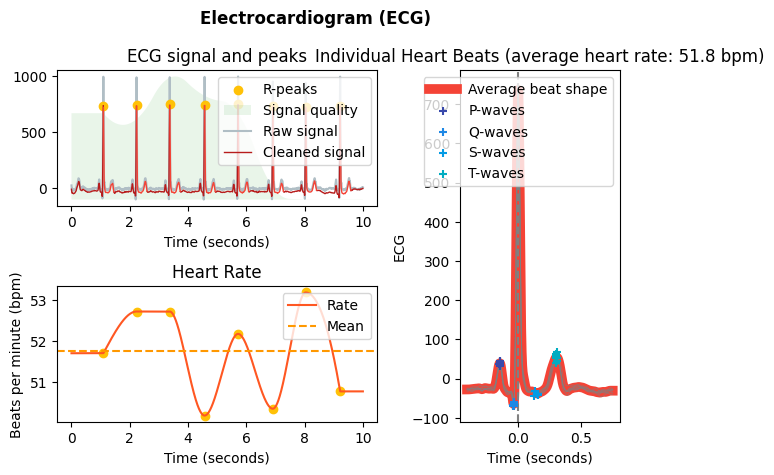

In [ ]:
nk.ecg_plot(signals, info)
plt.tight_layout()

#<h3><b>5. Extracción de características del ECG</h3></b>

El procesamiento de ECG con `nk.ecg_process ` proporciona un conjunto de características útiles como frecuencia cardíaca (ECG_Rate), calidad de la señal (ECG_Quality) y eventos cardíacos detectados (ECG_R_Peaks, ECG_P_Peaks, etc).

Puedes graficar cualquier columna del resultante, como ECG_T_Peaks, ECG_P_Peaks, etc. Solo necesitas usar los índices donde estos eventos son "1".

El método `nk.events_plot ` sirve para visualizar cualquier evento detectado, como los picos R o cualquier otro marcador de la señal ECG.

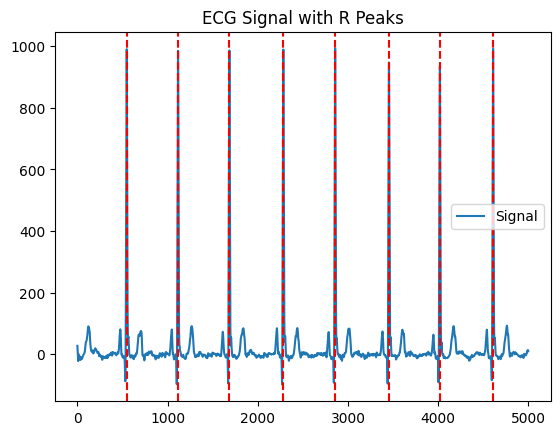

In [ ]:
rpeaks = info['ECG_R_Peaks']  # Extraer las posiciones de los picos R
nk.events_plot(rpeaks, signal_ekg)
plt.title("ECG Signal with R Peaks")
plt.show()

De igual forma puedes explorar con cualquier evento que desees graficar y analizar.

#<h3><b>6. Análisis de la forma de onda del ECG</h3></b>

Si estás interesado en realizar un análisis más detallado sobre la forma de la onda del ECG, puedes utilizar `ecg_delineate()`, función que no solo detecta los picos sino que también segmenta las diferentes fases del ciclo cardíaco.

La función `ecg_delineate()` identifica y separa las siguientes componentes del ciclo cardiaco:
- Onda P
- Complejo QRS
- Onda T

El análisis de la forma de la onda te permitirá identificar patrones específicos relacionados con la salud cardíaca y posibles anomalías en la temporalidad de estos componentes.

La función `nk.ecg_delineate` con los parámetros definidos como `show=True` y `show_type='peaks'` se utiliza para visualizar un solo ciclo cardíaco del ECG junto con los picos de las ondas detectados (P, Q, R, S, T).

(      ECG_P_Peaks  ECG_Q_Peaks  ECG_S_Peaks  ECG_T_Peaks  ECG_P_Onsets  \
 0               0            0            0            0             0   
 1               0            0            0            0             0   
 2               0            0            0            0             0   
 3               0            0            0            0             0   
 4               0            0            0            0             0   
 ...           ...          ...          ...          ...           ...   
 4995            0            0            0            0             0   
 4996            0            0            0            0             0   
 4997            0            0            0            0             0   
 4998            0            0            0            0             0   
 4999            0            0            0            0             0   
 
       ECG_T_Offsets  
 0                 0  
 1                 0  
 2                 0  
 3    

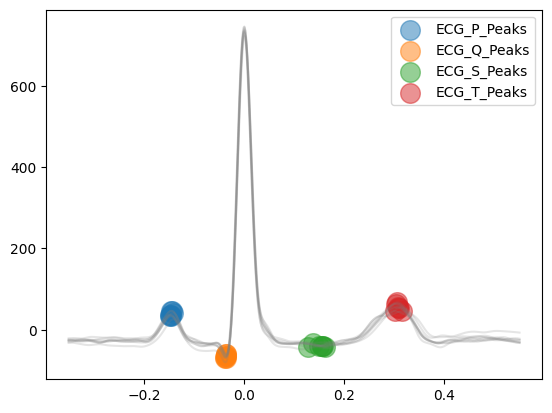

In [ ]:
clean_signal = signals["ECG_Clean"]
delineated = nk.ecg_delineate(clean_signal, sampling_rate=500, method="peak")

nk.ecg_delineate(clean_signal,rpeaks, sampling_rate=500,  method="peak", show=True,show_type='peaks')

Esta función retorna la siguiente información:

- La señal ECG original con las posiciones de las ondas delineadas (P, QRS, T), representadas como eventos en la señal.
- Un diccionario que contiene las posiciones de los eventos de cada onda en la señal de ECG. Estos eventos incluyen, por ejemplo:
> <b>ECG_P_Onsets:</b> el inicio de la onda P<br>
<b>ECG_P_Peaks:</b> el pico de la onda P<br>
<b>ECG_T_Onsets:</b> el inicio de la onda T<br>
<b>ECG_T_Peaks:</b> el pico de la onda T<br>
<b>ECG_R_Peaks:</b> los picos R (ya detectados previamente)

In [ ]:
signals2, waves = nk.ecg_delineate(clean_signal, rpeaks, sampling_rate=1000)
print(waves)

{'ECG_P_Peaks': [396, 987, 1503, 2125, 2745, 3224, 3889, 4428], 'ECG_P_Onsets': [383, 972, 1486, 2107, 2720, 3208, 3866, 4393], 'ECG_P_Offsets': [407, 1012, 1539, 2150, 2757, 3237, 3916, 4452], 'ECG_Q_Peaks': [528, 1098, 1667, 2265, 2839, 3436, 4000, nan], 'ECG_R_Onsets': [514, 1086, 1655, 2252, 2827, 3421, 3988, nan], 'ECG_R_Offsets': [601, 1170, 1738, 2327, 2907, 3514, 4070, 4651], 'ECG_S_Peaks': [624, 1194, 1762, 2346, 2932, 3534, 4086, nan], 'ECG_T_Peaks': [696, 1266, 1834, 2434, 3008, 3605, 4169, 4761], 'ECG_T_Onsets': [688, 1236, 1795, 2398, 2976, 3575, 4131, 4722], 'ECG_T_Offsets': [726, 1297, 1867, 2469, 3041, 3637, 4206, 4793]}


Finalmente con `nk.events_plot()`, se grafican los eventos de la onda P (su inicio y su pico) sobre la señal de ECG para ayudar a visualizar cómo se distribuyen estos eventos a lo largo de la señal.

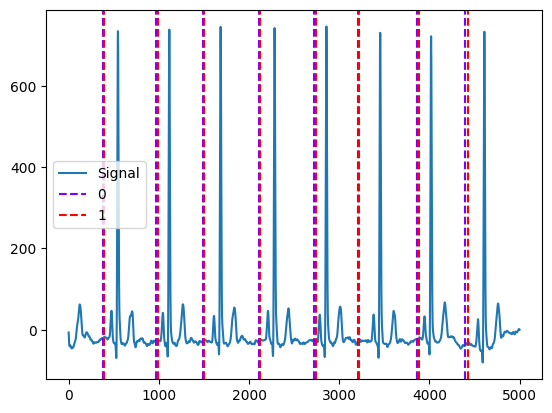

In [ ]:
nk.events_plot([waves["ECG_P_Onsets"], waves["ECG_P_Peaks"]], clean_signal)

#<b>Referencias</b>


<b>[1]:</b> Makowski, D., Pham, T., Lau, Z. J., Brammer, J. C., Lespinasse, F., Pham, H., Schölzel, C., & Chen, S. A. (2021). NeuroKit2: A Python toolbox for neurophysiological signal processing. <i>Behavior Research Methods</i>, 53(4), 1689-1696. https://doi.org/10.3758/s13428-020-01516-y